In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('indian_liver_patient.csv')


In [3]:
dataset.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
dataset.describe()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
dataset.shape


(583, 11)

In [6]:
dataset.columns


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

##Data Cleaning
Checking Duplicate tuples, if any will be removed

In [7]:
dataset.duplicated()


,0
0,False
1,False
2,False
3,False
4,False
...,...
578,False
579,False
580,False
581,False


In [8]:
dataset.duplicated().sum()


13

In [9]:
dataset = dataset.drop_duplicates()
print( dataset.shape )

(570, 11)


# Checking Missing Values

In [10]:
dataset.isna().sum()


,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,4


<Axes: xlabel='Albumin_and_Globulin_Ratio'>

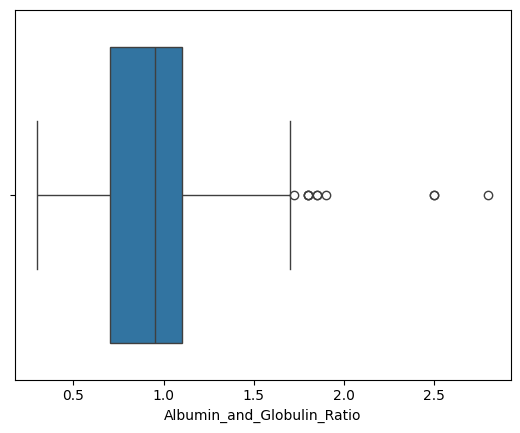

In [11]:
sns.boxplot(data = dataset, x= 'Albumin_and_Globulin_Ratio' )


In [12]:
dataset['Albumin_and_Globulin_Ratio'].mode()


,Albumin_and_Globulin_Ratio
0,1.0


In [13]:
dataset['Albumin_and_Globulin_Ratio'].median()


0.95

In [14]:
dataset['Albumin_and_Globulin_Ratio'].mean()


0.9480035335689044

In [15]:
dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())


<ipython-input-15-39640f9e8e3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Albumin_and_Globulin_Ratio'] = dataset['Albumin_and_Globulin_Ratio'].fillna(dataset['Albumin_and_Globulin_Ratio'].median())


In [16]:
dataset.isna().sum()


,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


# Male Vs Female


In [18]:
dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


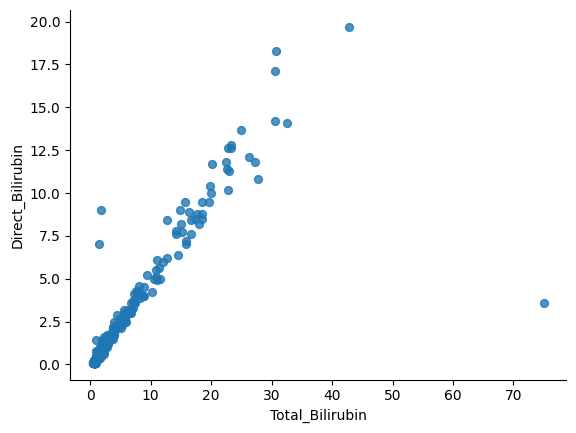

In [22]:
# @title Total_Bilirubin vs Direct_Bilirubin

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Total_Bilirubin', y='Direct_Bilirubin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

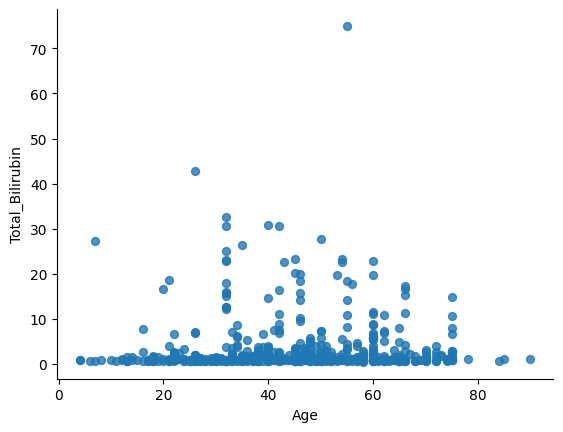

In [21]:
# @title Age vs Total_Bilirubin

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Age', y='Total_Bilirubin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-20-7aae10578fd3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(dataset, x='Age', y='Gender', inner='box', palette='Dark2')


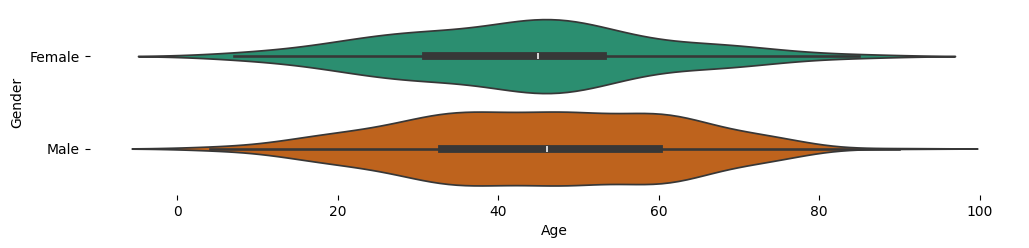

In [20]:
# @title Gender vs Age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(dataset['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(dataset, x='Age', y='Gender', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

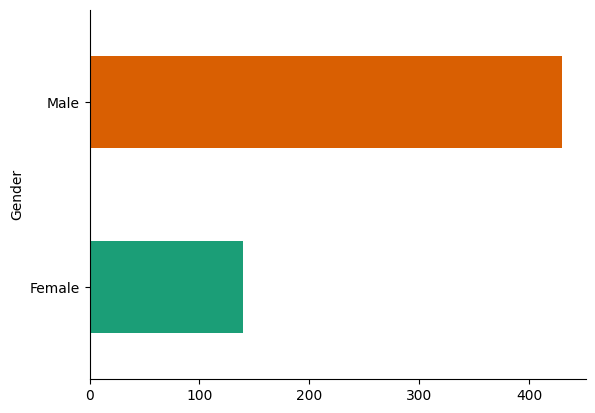

In [19]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
Male, Female = dataset['Gender'].value_counts()
print('Number of patients that are male: ',Male)
print('Number of patients that are female: ',Female)


Number of patients that are male:  430
Number of patients that are female:  140


# Encoding the Gender Column

In [24]:

def partition(x):
    if x == 'Male':
        return 1
    return 0

dataset['Gender'] = dataset['Gender'].map(partition)

In [25]:
dataset


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# Converting Output Column 'Dataset' to 0's and 1's

In [26]:

def partition(x):
    if x == 2:
        return 0
    return 1

dataset['Dataset'] = dataset['Dataset'].map(partition)

In [27]:
dataset['Dataset']


,Dataset
0,1
1,1
2,1
3,1
4,1
...,...
578,0
579,1
580,1
581,1


# Correlation Matrix

<Axes: >

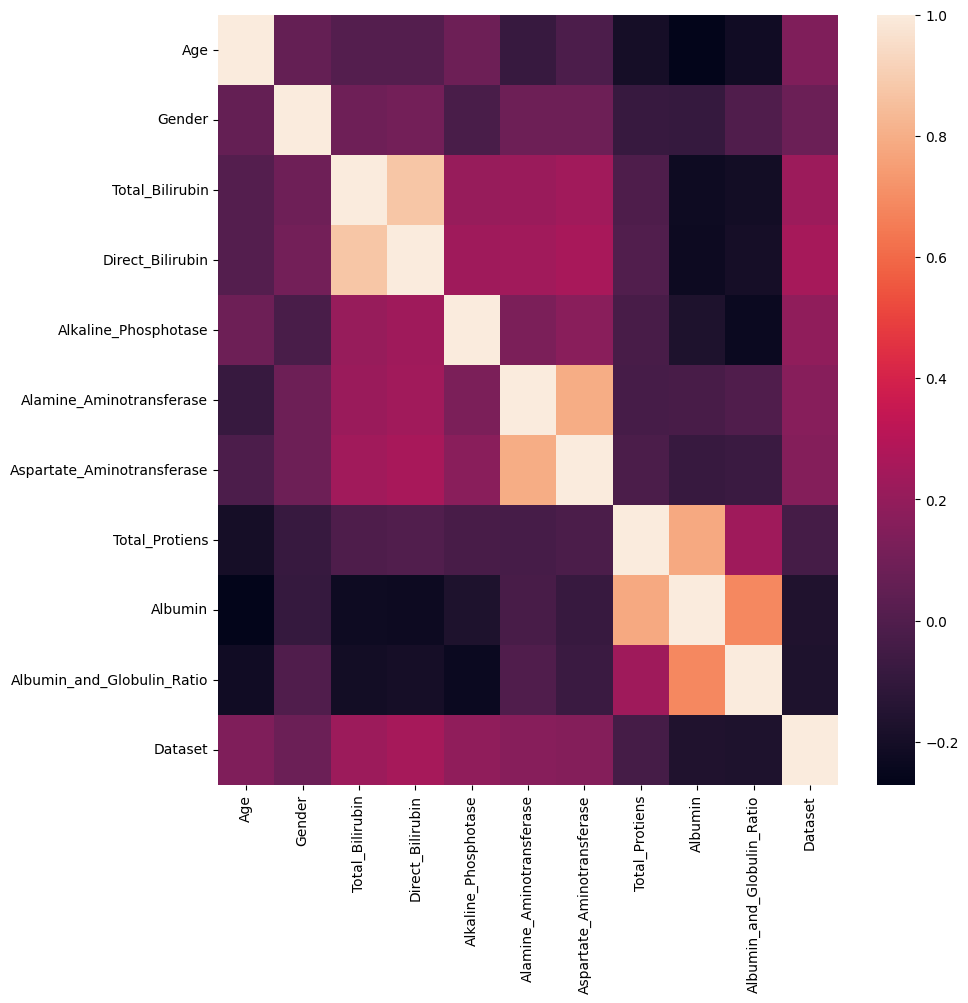

In [28]:

plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

# Data Preparation

In [29]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

In [30]:
#splitting data in to training data and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X , y , test_size = 0.25, random_state = 42)

In [31]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Machine Learning Models

In [32]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [33]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='auto', random_state=0)

In [34]:
# Predicting the output
log_y_pred = log_classifier.predict(x_test)

<Axes: >

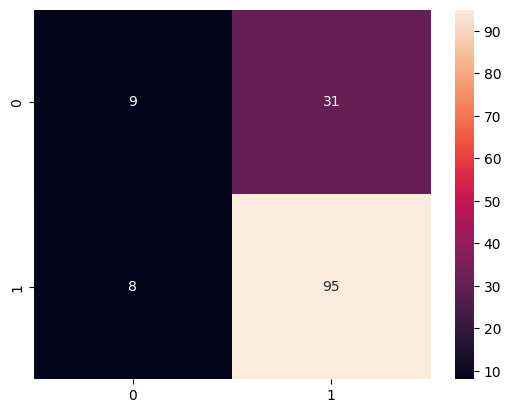

In [35]:
from sklearn.metrics import confusion_matrix
log_cm = confusion_matrix(y_test, log_y_pred)
sns.heatmap(log_cm , annot=True)

In [36]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,log_y_pred))
print(precision_score(y_test , log_y_pred))

0.7272727272727273
0.753968253968254


In [37]:
x_train.shape

(427, 10)

In [39]:
from sklearn.neighbors import KNeighborsClassifier


In [40]:
knn_classifier = KNeighborsClassifier(n_neighbors =21, metric = 'minkowski')
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [40]:
knn_y_pred = knn_classifier.predict(x_test)


In [42]:
from sklearn.metrics import confusion_matrix


<Axes: >

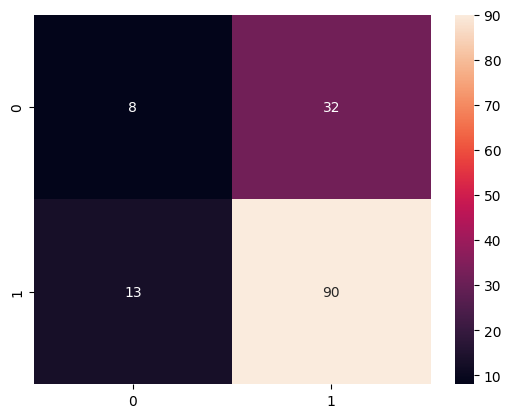

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming knn_classifier, x_test, and y_test are defined
knn_y_pred = knn_classifier.predict(x_test)
knn_cm = confusion_matrix(y_test, knn_y_pred) # Defining knn_cm
sns.heatmap(knn_cm, annot=True)

In [45]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,knn_y_pred))
print(precision_score(y_test , knn_y_pred))

0.7377049180327869


## SVM


In [47]:
from sklearn.svm import SVC


In [49]:
svm_classifier = SVC(kernel = 'rbf', random_state = 0)
svm_classifier.fit(x_train, y_train)

SVC(random_state=0)

In [50]:
svm_y_pred = svm_classifier.predict(x_test)


In [50]:
from sklearn.metrics import confusion_matrix


In [52]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and svm_y_pred are defined and available in the current session/kernel
svm_cm = confusion_matrix(y_test, svm_y_pred)  # Calculate the confusion matrix and assign it to svm_cm

# Now you can use svm_cm for visualization
sns.heatmap(svm_cm, annot=True)

In [53]:
from sklearn.metrics import accuracy_score, precision_score
print(accuracy_score(y_test,svm_y_pred))
print(precision_score(y_test , svm_y_pred))

0.723404255319149


# Artificial Neural Network



In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense,  Dropout

In [55]:
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 400 , activation='relu' , input_dim=10))
classifier.add(Dropout(rate=0.1))
# Adding Second hidden layer
classifier.add(Dense(units = 400 , activation='relu'))
classifier.add(Dropout(rate=0.1))
# Output layer
classifier.add(Dense(units = 1 , activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])


In [57]:
classifier.fit(x_train, y_train, batch_size=32 , epochs = 100)


Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6473 - loss: 0.6132
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6670 - loss: 0.5628
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6912 - loss: 0.5303
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7236 - loss: 0.4891
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7189 - loss: 0.4936
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7030 - loss: 0.5102
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7757 - loss: 0.4826
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7562 - loss: 0.4809
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7468 - loss: 0.4658
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7601 - loss: 0.4645
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7542 - loss: 0.4718
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy:

# Saving the models

In [62]:
import pickle
pickle.dump(svm_classifier, open('model.pkl', 'wb'))
pickle.dump(sc, open('sc.pkl', 'wb'))